In [1]:
import os
os.chdir('../')
# This should be the project root folder
os.getcwd()

'/home/pex/Documents/unitn/TODO/Applied_ML/lab/project'

In [2]:
import tensorflow as tf

from adda.models import Phase1Model
from adda.data_mng import Dataset

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from adda.settings import config as cfg

2021-12-13 14:46:03.596144: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2021-12-13 14:46:03.596195: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [3]:
# Load the dataset into the data object
dataset = Dataset('MNIST', 'training', sample=True, sample_size=75, batch_size=32)

In [4]:
len(dataset.data)
# len(dataset.labels)

75

In [5]:
data_b, labels_b = dataset.get_batch()

In [6]:
len(data_b)

32

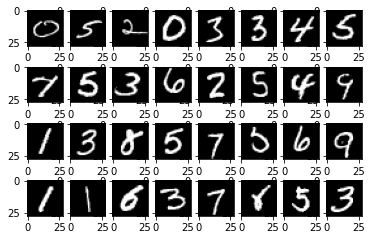

In [7]:
fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [8]:
labels_b

array([0, 5, 2, 0, 3, 3, 4, 5, 7, 5, 3, 6, 2, 5, 4, 9, 1, 3, 8, 5, 7, 5,
       6, 9, 1, 1, 6, 3, 7, 8, 5, 3])

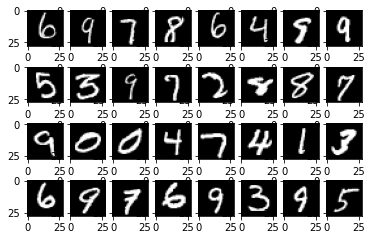

In [9]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [10]:
labels_b

array([6, 9, 7, 8, 6, 4, 9, 9, 5, 3, 9, 7, 2, 8, 8, 7, 9, 0, 0, 4, 7, 4,
       1, 3, 6, 9, 7, 6, 9, 3, 9, 5])

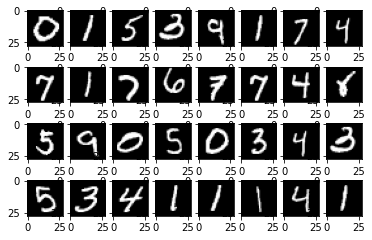

In [11]:
# This batch (the last available) is going to be padded.
# We're asking a batch of size 32, but we have only 75 - 64 = 9 residual data points.
# 32 - 9 = 23 data points will be randomly sampled from the 75 available data points.
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [12]:
labels_b

array([0, 1, 5, 3, 9, 1, 7, 4, 7, 1, 7, 6, 7, 7, 4, 8, 5, 9, 0, 5, 0, 3,
       4, 3, 5, 3, 4, 1, 1, 1, 4, 1])

In [13]:
# The invoketion returns None, None, due to the end of available batches
data_b, labels_b = dataset.get_batch()

In [14]:
# Let's rewind the interator
dataset.reset_pos()

In [15]:
# Shuffle the data
dataset.shuffle()

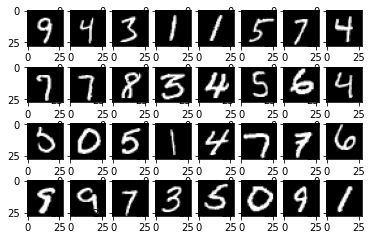

In [16]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [17]:
labels_b

array([9, 4, 3, 1, 1, 5, 7, 4, 7, 7, 8, 3, 4, 5, 6, 4, 5, 0, 5, 1, 4, 7,
       7, 6, 9, 9, 7, 3, 5, 0, 9, 1])

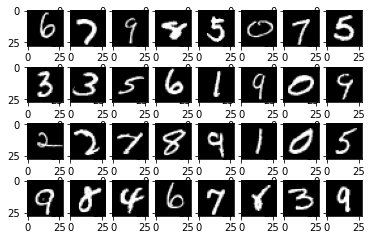

In [18]:
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [19]:
labels_b

array([6, 7, 9, 8, 5, 0, 7, 5, 3, 3, 5, 6, 1, 9, 0, 9, 2, 2, 7, 8, 9, 1,
       0, 5, 9, 8, 4, 6, 7, 8, 3, 9])

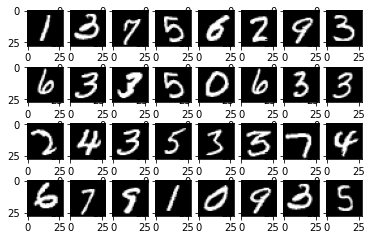

In [20]:
# This batch (the last available) is going to be padded.
# We're asking a batch of size 32, but we have only 75 - 64 = 9 residual data points.
# 32 - 9 = 23 data points will be randomly sampled from the 75 available data points.
data_b, labels_b = dataset.get_batch()

fig, ax = plt.subplots(4, 8)
ax = ax.flatten()

for i in range(32):
    resized_img = np.reshape(data_b[i], (28, 28))
    ax[i].imshow(resized_img, cmap='gray')

In [21]:
labels_b

array([1, 3, 7, 5, 6, 2, 9, 3, 6, 3, 3, 5, 0, 6, 3, 3, 2, 4, 3, 5, 3, 3,
       7, 4, 6, 7, 9, 1, 0, 9, 3, 5])

In [22]:
# Load the trained and saved model
model = tf.keras.models.load_model(cfg.PHASE1_MODEL_PATH, compile=False)
model.summary()

2021-12-13 14:46:42.061703: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2021-12-13 14:46:42.068749: W tensorflow/stream_executor/cuda/cuda_driver.cc:326] failed call to cuInit: UNKNOWN ERROR (303)
2021-12-13 14:46:42.068814: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (PexNotebook): /proc/driver/nvidia/version does not exist


Model: "phase1_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
le_net_encoder (LeNetEncoder multiple                  25570     
_________________________________________________________________
le_net_classifier (LeNetClas multiple                  405510    
Total params: 431,080
Trainable params: 431,080
Non-trainable params: 0
_________________________________________________________________


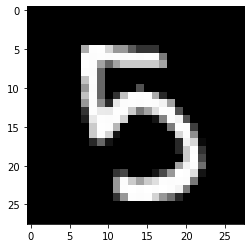

In [23]:
# Select an image to be classified by the model
img = data_b[3]
plottable_image = np.reshape(img, (28, 28))
plt.gray()
plt.imshow(plottable_image)
plt.show()

In [24]:
# Verify the label associated to the training datapoint
label = labels_b[3]
label

5

In [25]:
# Expand dimensions to [1, 28, 28, 1]
img = np.reshape(img, (1, 28, 28, 1))
np.shape(img)

(1, 28, 28, 1)

In [26]:
# Replicate the image expanding the dimensions to [2, 28, 28, 1]
# Why? Because TensorFlow doesn't like a single input; so a replication is needed.
img = np.tile(img, [2, 1, 1, 1])
np.shape(img)

(2, 28, 28, 1)

In [27]:
# Let's make a class prediction for the selected image
logits, preds = model(img, training=False)

# Extract the maximun value of the class probabilities
prediction = tf.argmax(preds, -1)
print('Class: {}'.format(prediction[0]))
print('Predictions: {}'.format(preds[0]))

# We generated a feature map of a USPS data point using the CNN encoder trained with the MNIST dataset.
# Obviously it is wrongly classified.

Class: 5
Predictions: [8.6849575e-08 1.8806126e-08 7.1202653e-06 3.7308382e-03 1.5041795e-07
 9.9065053e-01 1.7208947e-07 2.4065184e-05 5.3568538e-03 2.3011268e-04]


2021-12-13 14:46:43.830407: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)
2021-12-13 14:46:43.850849: I tensorflow/core/platform/profile_utils/cpu_utils.cc:114] CPU Frequency: 2691275000 Hz
